# Worksheet 16

Name: Pranesh Jayasundar
UID: U08334002

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

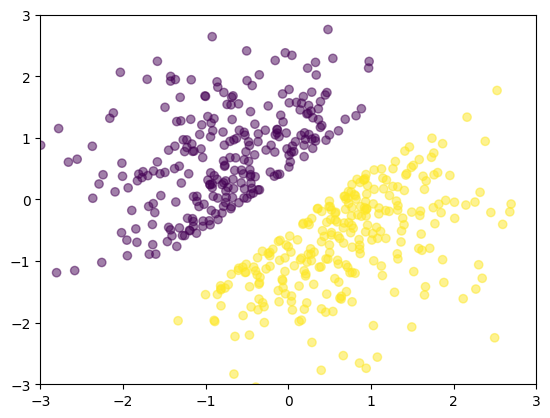

In [2]:
# Generate the linearly separable dataset
X, Y = generate_line_data()

# Create a logistic regression
lr = LogisticRegression()

# Fit the model
lr.fit(X, Y)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot()
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
model = LogisticRegression().fit(X, Y)
beta = model.coef_
intercept = model.intercept_
print(model.coef_)
print(model.intercept_)

[[ 4.11337993 -4.10105513]]
[0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

-----------------
Decision boundary
-----------------
y = 1.00301x + [0.01423894]


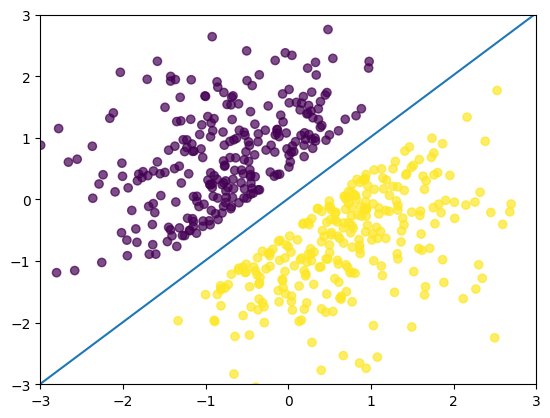

In [4]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x_vals = np.array(plt.xlim())
# y_vals = -(lr.intercept_[0] + lr.coef_[0][0]*x_vals) / lr.coef_[0][1]
y_vals = - (intercept + beta[0][0] * x_vals) / beta[0][1]

print('-----------------')
print('Decision boundary')
print('-----------------')
print("y = {:.5f}x + {}".format(-beta[0][0] / beta[0][1], -intercept / beta[0][1]))
plt.plot(x_vals, y_vals)
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

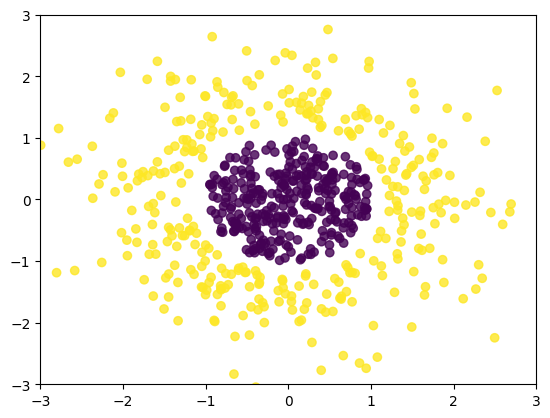

In [5]:
X, Y = generate_circle_data(t)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', alpha=0.8)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot()
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [6]:
from sklearn.linear_model import LogisticRegression

# Compute transformed feature vector
X_transformed = np.sqrt(X[:,0] ** 2 + X[:,1] ** 2)

# Fit logistic regression model to transformed data
logreg = LogisticRegression()
logreg.fit(X_transformed.reshape(-1,1), Y)



LogisticRegression()

f) Plot the decision boundary using the code below.

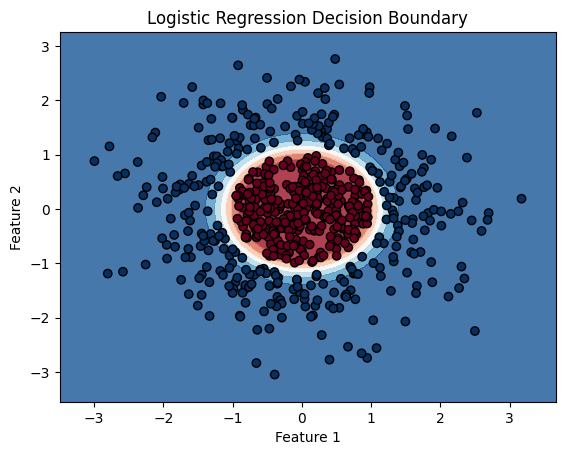

In [7]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# compute transformed feature vector for mesh data
mesh_transformed = np.sqrt(meshData[:,0] ** 2 + meshData[:,1] ** 2)

# predict probabilities and labels for mesh data
probs = logreg.predict_proba(mesh_transformed.reshape(-1, 1))[:, 1]
labels = logreg.predict(mesh_transformed.reshape(-1, 1))

# plot decision boundary and training data
fig, ax = plt.subplots()
ax.contourf(xx, yy, probs.reshape(xx.shape), cmap="RdBu", alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdBu", edgecolors='k')
ax.set_title("Logistic Regression Decision Boundary")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()


g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

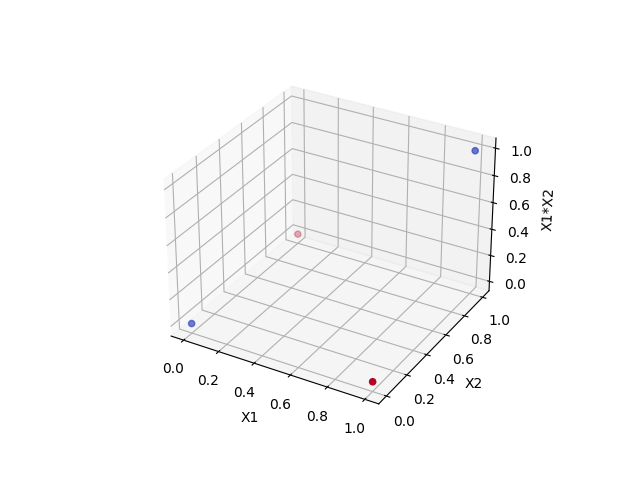

In [8]:
%matplotlib widget 
# Requires: pip3 install ipympl
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()

# Add interaction term
X_3d = np.hstack((X, X[:, 0].reshape(-1, 1) * X[:, 1].reshape(-1, 1)))

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Y, cmap='coolwarm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1*X2')
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77259D+00    |proj g|=  5.00000D-01

At iterate    1    f=  2.67246D+00    |proj g|=  9.88769D-02

At iterate    2    f=  2.66571D+00    |proj g|=  2.97195D-02

At iterate    3    f=  2.66538D+00    |proj g|=  1.94970D-02

At iterate    4    f=  2.66509D+00    |proj g|=  5.52026D-03

At iterate    5    f=  2.66505D+00    |proj g|=  3.43819D-03

At iterate    6    f=  2.66503D+00    |proj g|=  4.28242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.


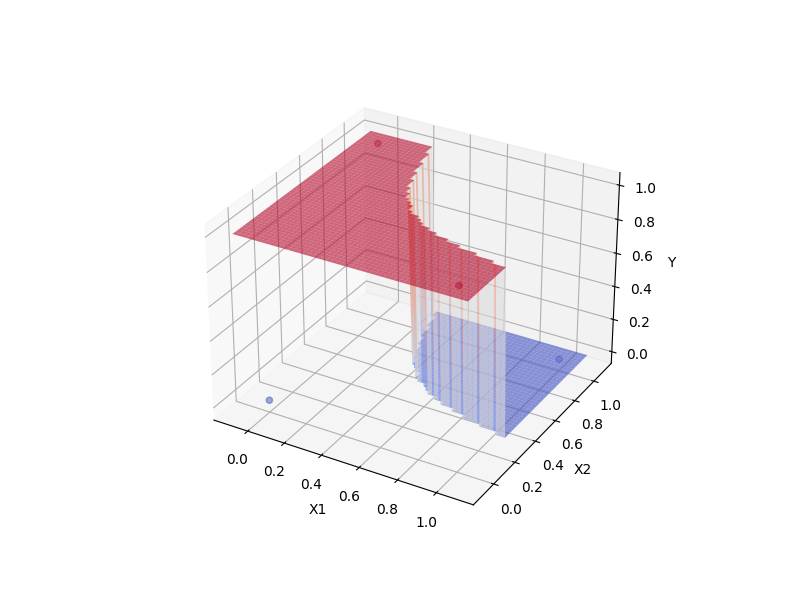

In [23]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# generate grid points for visualization
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 50),
                       np.linspace(x2_min, x2_max, 50))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]

# apply logistic regression model with interaction term
poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
lr = LogisticRegression(verbose=2).fit(poly, Y)
model = make_pipeline(poly, lr)

# predict and plot decision boundary
Z = model.predict(X_grid)
Z = Z.reshape(xx1.shape)
ax.plot_surface(xx1, xx2, Z, cmap='coolwarm', alpha=0.6)

# plot data points
ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='coolwarm')

# set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()


i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

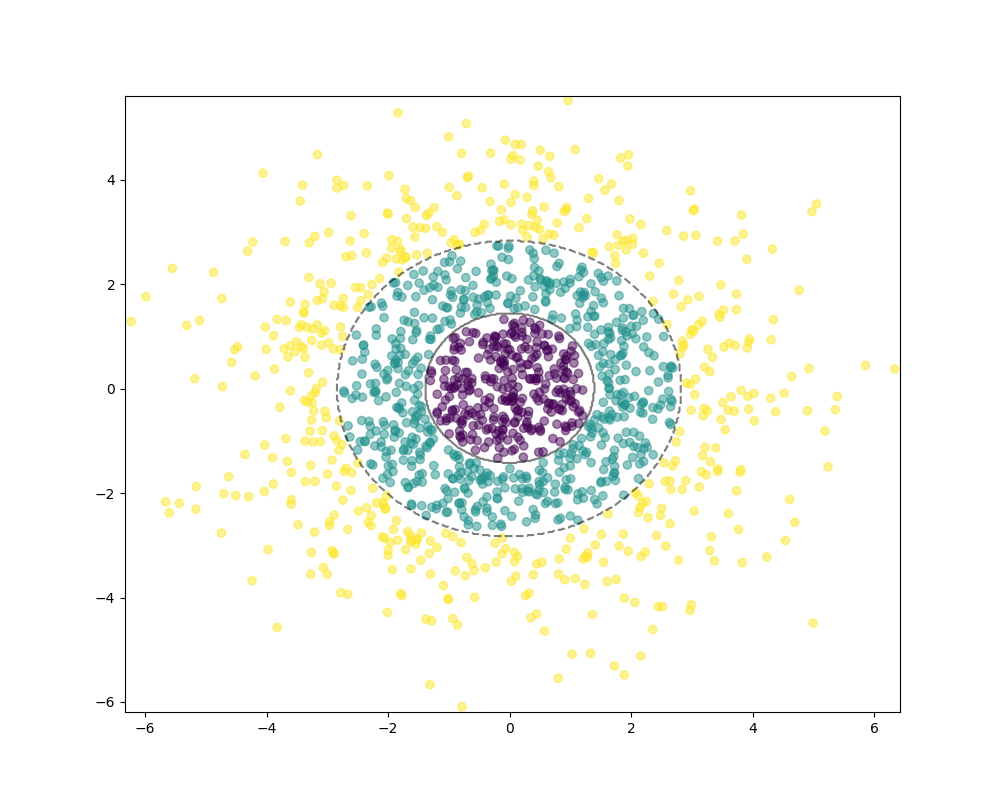

In [24]:
import matplotlib.pyplot as plt

t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(degree = 2)
lr = LogisticRegression(verbose = 2, max_iter = 1000)
model = make_pipeline(poly, lr)

model.fit(X, Y)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10,8))

# create a mesh to plot in
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision boundary
ax.contour(xx, yy, Z, colors='k', levels=[-0.5, 0.5, 1.5], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', alpha=0.5)
plt.show()